In [1]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
import seaborn as sb
import fn_interference as fn
from scipy.constants import c
%matplotlib widget

In [2]:
wavelength = 640e-9 #nm
largeur = 10e-9 #ns
MIN  = -5*largeur
MAX = 5*largeur
N = 10000
angle_pre_selection = np.pi/4
ellipse_pre = 0
phi_x = 0
phi_y = 0
d = 0.003 #différence de distance parcouru des deux faisceau (m)

n = 1 #nombre de figure
time = np.linspace(MIN, MAX, N)
#z = np.linspace(MIN*c, MAX*c, N)

/home/shane/.local/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


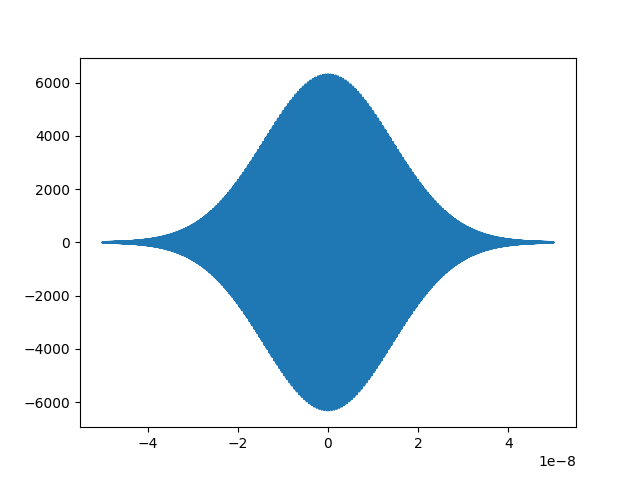

In [3]:
E = fn.electric_field_wavefn(time, 0, largeur, wavelength)
plt.figure(1)
plt.plot(time, E)
plt.show()

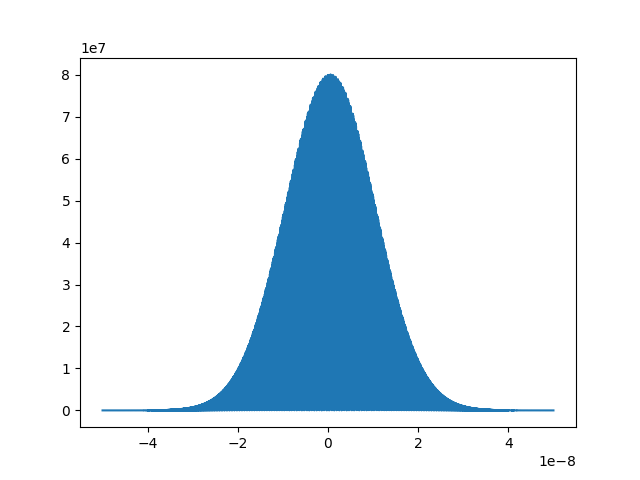

In [4]:
I, E_1, E_2_t = fn.michelson(E, largeur/10, largeur, wavelength, time, 0)
plt.figure(2)
plt.plot(time, I)
plt.show()

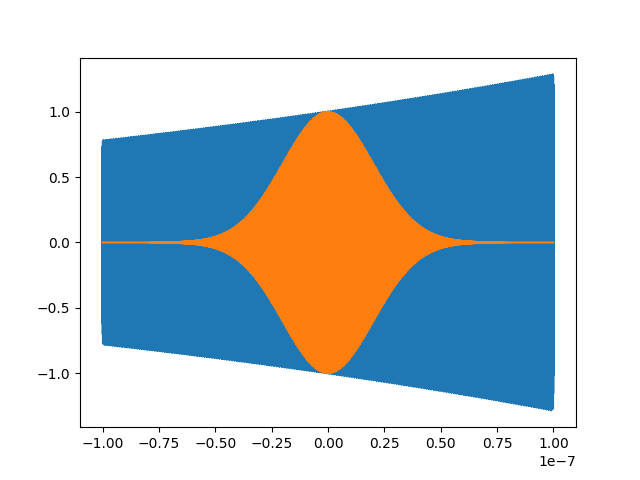

In [5]:
tau = np.linspace(-10*largeur, 10*largeur, N)
g_1_t = (np.conjugate(E_1)*E_2_t)/(np.conjugate(E_1)*E_1)

#curve fit
def g_1_fit(tau, sigma, wavelength):
    freq = c/wavelength
    w = freq*2*np.pi
    return np.exp(-tau*(1j*w + tau/(8*sigma**2)))

g_1_fit = g_1_fit(tau, largeur, wavelength)

plt.figure(3)
plt.plot(tau, g_1_t)
plt.plot(tau, g_1_fit)
plt.show()
